## Setup

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [104]:
df = pd.read_csv("Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,218945.0,...,1147187.0,1146710.0,1147090.0,1147833.0,1148717.0,1148276.0,1152108.0,1160117.0,1164604.0,1164231.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,195076.0,...,405010.0,405461.0,406698.0,408293.0,410351.0,412261.0,414306.0,416267.0,417997.0,419795.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1721974.0,1720842.0,1717028.0,1714060.0,1714273.0,1719429.0,1721641.0,1722443.0,1719270.0,1718401.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,263993.0,264834.0,265177.0,266047.0,267064.0,268704.0,270651.0,273364.0,275817.0,278966.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,210976.0,...,455800.0,455937.0,457165.0,458964.0,461415.0,463713.0,466099.0,468604.0,470797.0,473676.0


In [70]:
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


----------------------------------------------------------------------

How to melt a dataframe

cheese_list = []

for i in list(df.RegionID):

    one_obsv_df = df.loc[df['RegionID']== i]
    
    cheese = pd.concat([one_obsv_df.RegionID,one_obsv_df.iloc[:,8:]],axis = 1)
    
    cheese = pd.melt(cheese, id_vars =['RegionID'])
    
    cheese_list.append(cheese)
    
cheese_df = pd.concat(cheese_list, axis = 0)

cheese_df.variable = pd.to_datetime(cheese_df.variable)

#cheese_df.to_csv('cheese_df.csv',index=False)



--------------------------------------------------------

In [ ]:
cheese_list = []

for i in list(df.RegionID):

    one_obsv_df = df.loc[df['RegionID']== i]

    cheese = pd.concat([one_obsv_df.RegionID,one_obsv_df.iloc[:,8:]],axis = 1)

    cheese = pd.melt(cheese, id_vars =['RegionID'])

cheese_list.append(cheese)
cheese_df = pd.concat(cheese_list, axis = 0)

cheese_df.variable = pd.to_datetime(cheese_df.variable)

#cheese_df.to_csv('cheese_df.csv',index=False)

In [71]:
cheese_df = pd.read_csv('cheese_df.csv')
cheese_df.head()

,RegionID,variable,value
0,84654,1996-05-01,335400.0
1,84654,1996-06-01,336500.0
2,84654,1996-07-01,337600.0
3,84654,1996-08-01,338500.0
4,84654,1996-09-01,339500.0


In [96]:
cheese_df.value.max()

19314900.0

# EDA 

## Process melted to separate cities

In [72]:
sf_id = list(df[df.CountyName == 'San Francisco'].RegionID)

sf_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  sf_id], axis = 0)


la_id = list(df[df.CountyName == 'Los Angeles'].RegionID)

la_cheese_df = pd.concat([cheese_df[cheese_df.RegionID == i] for i in  la_id], axis = 0)

In [ ]:
sf_cheese_df

In [73]:
sf_cheese_df_97564 = sf_cheese_df[sf_cheese_df.RegionID == sf_id[0]]

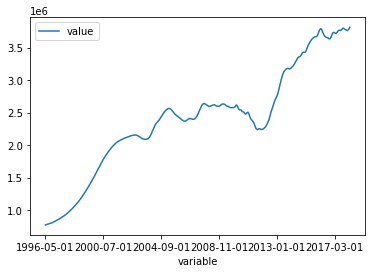

In [74]:
sf_cheese_df_97564.plot(x='variable', y = 'value') 

In [75]:
pd.to_datetime(sf_cheese_df_97564.variable)

2376   1996-05-01
2377   1996-06-01
2378   1996-07-01
2379   1996-08-01
2380   1996-09-01
          ...    
2635   2017-12-01
2636   2018-01-01
2637   2018-02-01
2638   2018-03-01
2639   2018-04-01
Name: variable, Length: 264, dtype: datetime64[ns]

In [76]:
sf_cheese_df_97564.variable = pd.to_datetime(sf_cheese_df_97564.variable)

In [77]:
sf_cheese_df_97564.variable.describe()

count                     264
unique                    264
top       2009-08-01 00:00:00
freq                        1
first     1996-05-01 00:00:00
last      2018-04-01 00:00:00
Name: variable, dtype: object

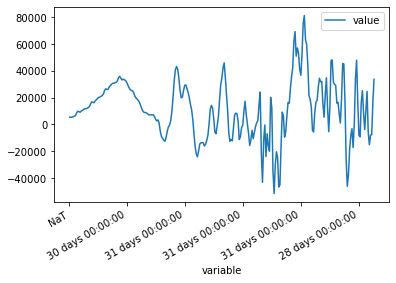

In [78]:
sf_cheese_df_97564.diff().plot(x='variable', y = 'value')

In [79]:
dftest = adfuller(sf_cheese_df_97564.value)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print (dfoutput)

Test Statistic                  -1.132780
p-value                          0.701824
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [80]:
dftest = adfuller(sf_cheese_df_97564.value.diff().dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print (dfoutput)

Test Statistic                  -3.534352
p-value                          0.007147
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [81]:
sf_cheese_df_97564

,RegionID,variable,value
2376,97564,1996-05-01,771100.0
2377,97564,1996-06-01,776500.0
2378,97564,1996-07-01,781900.0
2379,97564,1996-08-01,787300.0
2380,97564,1996-09-01,793000.0
...,...,...,...
2635,97564,2017-12-01,3778700.0
2636,97564,2018-01-01,3770800.0
2637,97564,2018-02-01,3763100.0
2638,97564,2018-03-01,3779800.0


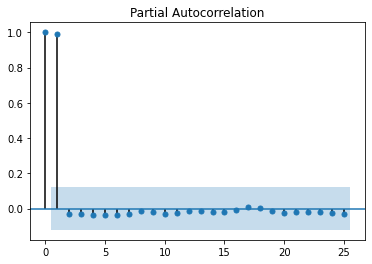

In [82]:
plot_pacf(sf_cheese_df_97564.value);

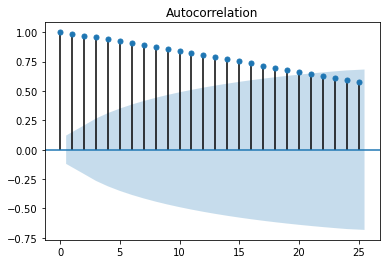

In [83]:
plot_acf(sf_cheese_df_97564.value);

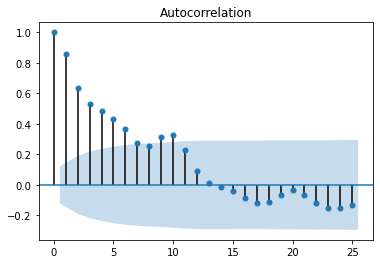

In [84]:
plot_acf(sf_cheese_df_97564.value.diff().dropna());

<Figure size 432x288 with 0 Axes>

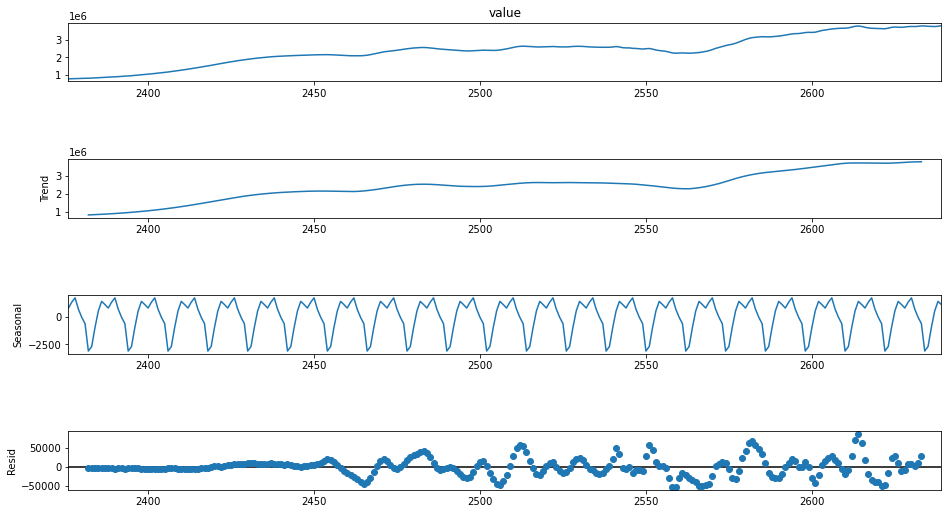

In [85]:
decomposition = seasonal_decompose(sf_cheese_df_97564.value, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [86]:
sf_cheese_df_97564.variable.describe()

count                     264
unique                    264
top       2009-08-01 00:00:00
freq                        1
first     1996-05-01 00:00:00
last      2018-04-01 00:00:00
Name: variable, dtype: object

In [87]:
sf_cheese_df_97564.drop('RegionID', axis=1, inplace=True)

In [88]:
sf_cheese_df_97564.columns

Index(['variable', 'value'], dtype='object')

In [89]:
sf_cheese_df_97564.columns = ['date','value']

In [91]:
sf_cheese_df_97564

,value
date,
1996-05-01,771100.0
1996-06-01,776500.0
1996-07-01,781900.0
1996-08-01,787300.0
1996-09-01,793000.0
...,...
2017-12-01,3778700.0
2018-01-01,3770800.0
2018-02-01,3763100.0


In [92]:
sf_cheese_df_97564 = sf_cheese_df_97564.asfreq('MS')

In [93]:
sf_cheese_df_97564

,value
date,
1996-05-01,771100.0
1996-06-01,776500.0
1996-07-01,781900.0
1996-08-01,787300.0
1996-09-01,793000.0
...,...
2017-12-01,3778700.0
2018-01-01,3770800.0
2018-02-01,3763100.0


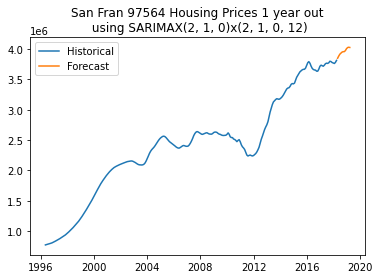

In [94]:
sari_mod =SARIMAX(sf_cheese_df_97564,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
forecast = sari_mod.forecast(steps=12)
fig, ax = plt.subplots()

ax.plot(sf_cheese_df_97564.index, sf_cheese_df_97564.value, label='Historical')
ax.plot(forecast, label='Forecast')
ax.set_title(f'San Fran 97564 Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')

plt.legend();

In [ ]:
pd

In [101]:
ids = list(set(sf_cheese_df.RegionID))
keys = ["sf_cheese_df_" + i for i in list(map(str,ids))]
sf_df_list= []
for i in ids:
    sf_df_list.append(sf_cheese_df[sf_cheese_df.RegionID == i])
    sf_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    sf_df_list[-1].columns = ['date', 'value']
    sf_df_list[-1].date = pd.to_datetime(sf_df_list[-1].date)
    sf_df_list[-1].set_index('date', inplace = True)
    sf_df_list[-1].asfreq('MS')
sf_dict = dict(zip(keys,sf_df_list))
ids = list(set(la_cheese_df.RegionID))
keys = ["la_cheese_df_" + i for i in list(map(str,ids))]
la_df_list= []
for i in ids:
    la_df_list.append(la_cheese_df[la_cheese_df.RegionID == i])
    la_df_list[-1].drop('RegionID', inplace = True, axis = 1)
    la_df_list[-1].columns = ['date', 'value']
    la_df_list[-1].date = pd.to_datetime(la_df_list[-1].date)
    la_df_list[-1].set_index('date', inplace = True)
    la_df_list[-1].asfreq('MS')
la_dict = dict(zip(keys,la_df_list))

In [102]:
sf_dict

{'sf_cheese_df_97558':                 value
 date                 
 1996-05-01   280900.0
 1996-06-01   280800.0
 1996-07-01   280700.0
 1996-08-01   280500.0
 1996-09-01   280400.0
 ...               ...
 2017-12-01  1792100.0
 2018-01-01  1812100.0
 2018-02-01  1821100.0
 2018-03-01  1829300.0
 2018-04-01  1837700.0
 
 [264 rows x 1 columns],
 'sf_cheese_df_97562':                 value
 date                 
 1996-05-01   273000.0
 1996-06-01   275200.0
 1996-07-01   277500.0
 1996-08-01   279800.0
 1996-09-01   282100.0
 ...               ...
 2017-12-01  1698200.0
 2018-01-01  1717400.0
 2018-02-01  1737600.0
 2018-03-01  1757900.0
 2018-04-01  1772500.0
 
 [264 rows x 1 columns],
 'sf_cheese_df_97564':                 value
 date                 
 1996-05-01   771100.0
 1996-06-01   776500.0
 1996-07-01   781900.0
 1996-08-01   787300.0
 1996-09-01   793000.0
 ...               ...
 2017-12-01  3778700.0
 2018-01-01  3770800.0
 2018-02-01  3763100.0
 2018-03-01  3779800.0
 2018-

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/ts

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


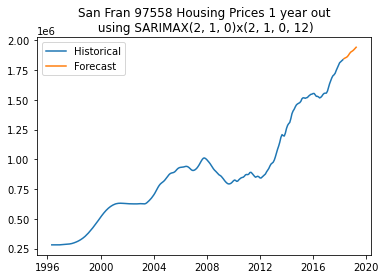

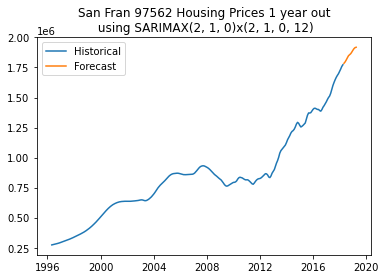

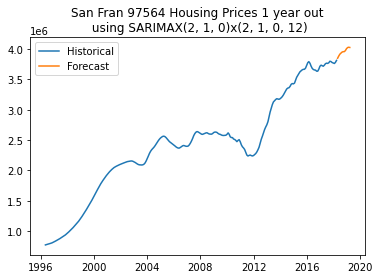

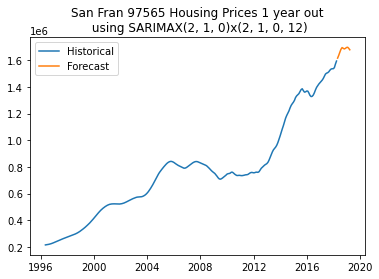

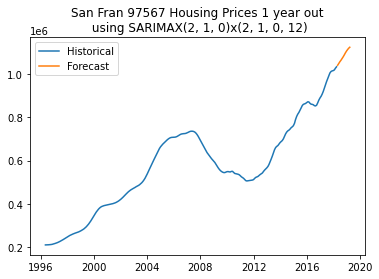

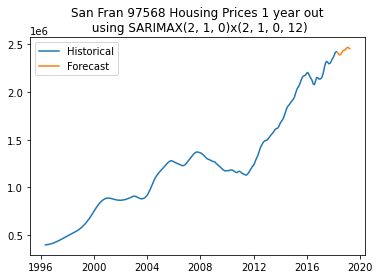

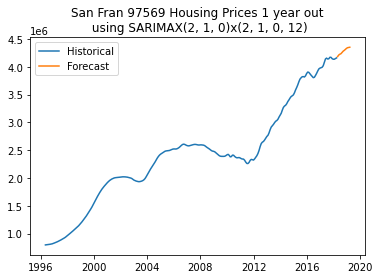

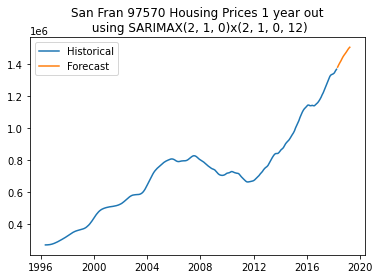

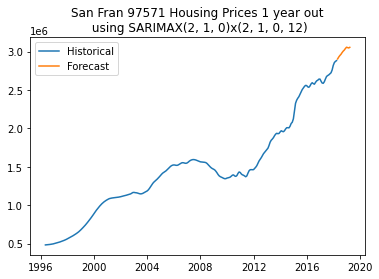

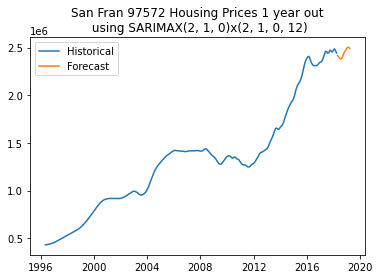

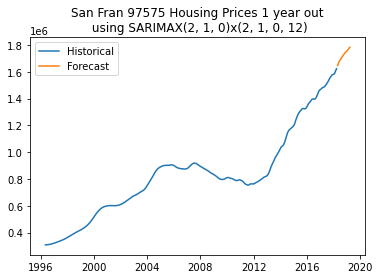

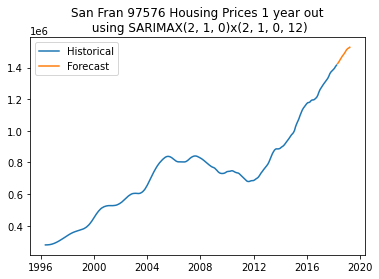

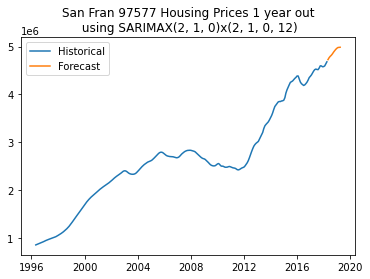

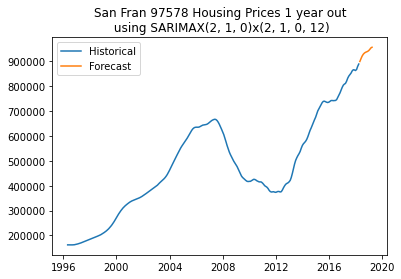

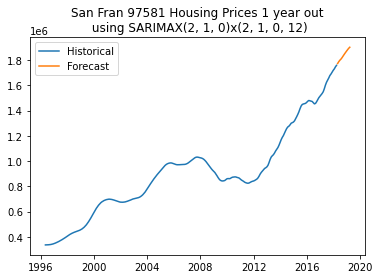

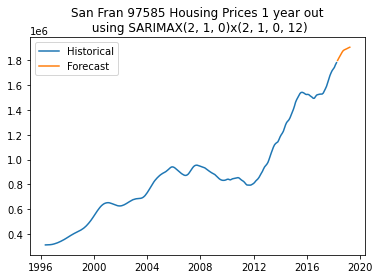

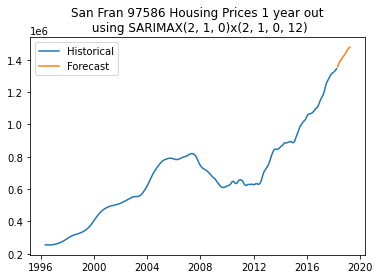

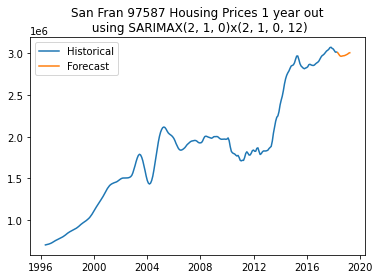

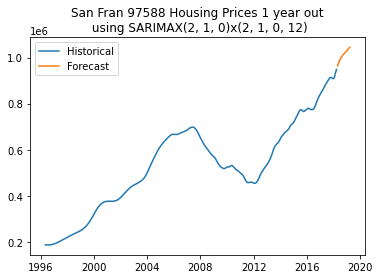

In [103]:
sf_forecast_dict = {}
for regionid, df  in sf_dict.items():
    sari_mod =SARIMAX(df,
                  order=(2, 1, 0),
                  seasonal_order=(2, 1, 0, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
    forecast = sari_mod.forecast(steps=12)
    sf_forecast_dict[regionid] = forecast
    fig, ax = plt.subplots()
    ax.plot(df.index, df.value, label='Historical')
    ax.plot(forecast, label='Forecast')
    ax.set_title(f'San Fran {regionid[-5:]} Housing Prices 1 year out\n using SARIMAX(2, 1, 0)x(2, 1, 0, 12)')
    plt.legend();